Cargamos las librerias y el dataset nuevo ya limpio

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import time

In [16]:
df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')

/tmp/ipython-input-2911200300.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')


In [17]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,...,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,736185,106,4150080.00,31680,131.00,...,3,6,0.217,1,0,1.0,7,56021.0,0.733077,26
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,736173,126,5750057.68,43436,132.38,...,4,6,0.667,1,1,0.0,7,71539.0,0.707238,22
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,736309,48,10300158.00,52021,198.00,...,3,6,0.500,1,0,0.0,7,48160.0,2.391765,4
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,736237,138,2975068.00,22202,134.00,...,1,6,0.273,1,0,0.0,6,51238.0,2.150789,21
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,736204,286,3920076.00,48396,81.00,...,2,2,0.333,0,1,1.0,1,62588.0,0.763286,6


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318539 entries, 0 to 318538
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   url                               318539 non-null  object 
 1   id                                318539 non-null  object 
 2   Lng                               318539 non-null  float64
 3   Lat                               318539 non-null  float64
 4   Cid                               318539 non-null  int64  
 5   tradeTime                         318539 non-null  int64  
 6   followers                         318539 non-null  int64  
 7   totalPrice                        318539 non-null  float64
 8   price                             318539 non-null  int64  
 9   square                            318539 non-null  float64
 10  livingRoom                        318539 non-null  int64  
 11  drawingRoom                       318539 non-null  i

Esta todo ok

Definimos X e y

In [19]:
columnas_X = ['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
              'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
              'district', 'communityAverage', 'distancia_km_a_subte_mas_cercano', 'piso']
columna_Y = 'totalPrice'
columna_Y2 = 'price'

In [20]:
X = df[columnas_X]
y = df[columna_Y]
y2 = df[columna_Y2]

In [21]:
X

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,736185,106,131.00,2,1,1,1,1.0,2005.000000,3,6,0.217,1,0,7,56021.0,0.733077,26
1,736173,126,132.38,2,2,1,2,1.0,2004.000000,4,6,0.667,1,1,7,71539.0,0.707238,22
2,736309,48,198.00,3,2,1,3,4.0,2005.000000,3,6,0.500,1,0,7,48160.0,2.391765,4
3,736237,138,134.00,3,1,1,1,1.0,2008.000000,1,6,0.273,1,0,6,51238.0,2.150789,21
4,736204,286,81.00,2,1,1,1,4.0,1960.000000,2,2,0.333,0,1,1,62588.0,0.763286,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318534,736125,8,170.07,3,2,1,2,4.0,2003.000000,1,6,0.333,0,1,3,36545.0,2.059801,5
318535,736125,1,35.09,1,0,1,1,1.0,2009.000000,1,6,0.222,1,0,3,54282.0,0.685682,24
318536,736120,2,102.17,2,2,1,2,4.0,2000.000000,3,6,0.500,1,1,3,46927.0,0.646323,7
318537,736127,4,178.34,4,2,1,2,4.0,2003.000000,4,2,0.500,0,1,3,54842.0,0.507385,5


In [22]:
# Vemos cantidad de valores unicos por columna
for col in X:
  print(f'{col}: ', X[col].nunique())

tradeTime:  2550
followers:  547
square:  18292
livingRoom:  8
drawingRoom:  3
kitchen:  3
bathRoom:  4
buildingType:  10
constructionTime:  158
renovationCondition:  4
buildingStructure:  6
ladderRatio:  181
elevator:  2
fiveYearsProperty:  2
district:  13
communityAverage:  4455
distancia_km_a_subte_mas_cercano:  4034
piso:  40


## Encoding de categoricas

No hace falta, porque para 'elevator' y 'fiveYearsProperty' que usariamos One Hot, nos quedaria una sola columna si eliminamos la segunda (drop_first=True).

Sí para los distritos.


In [23]:
X['district'] = X['district'].astype('object')

/tmp/ipython-input-2464628391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['district'] = X['district'].astype('object')


In [24]:
X = pd.get_dummies(X,drop_first=True)
for col in X.columns:
  if col.startswith('district_'):
    X[col] = X[col].astype(int)

## Estandarizamos

Estandarizamos las variables numericas que no tienen pocas categorias, o sea que no consideramos como categoricas

In [25]:
X.columns

Index(['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'communityAverage',
       'distancia_km_a_subte_mas_cercano', 'piso', 'district_2', 'district_3',
       'district_4', 'district_5', 'district_6', 'district_7', 'district_8',
       'district_9', 'district_10', 'district_11', 'district_12',
       'district_13'],
      dtype='object')

In [26]:
vars_estandarizar = ['tradeTime', 'followers', 'square','constructionTime','ladderRatio',
                     'communityAverage', 'distancia_km_a_subte_mas_cercano']

In [27]:
scaler = StandardScaler()
X[vars_estandarizar] = scaler.fit_transform(X[vars_estandarizar])

## Correlaciones

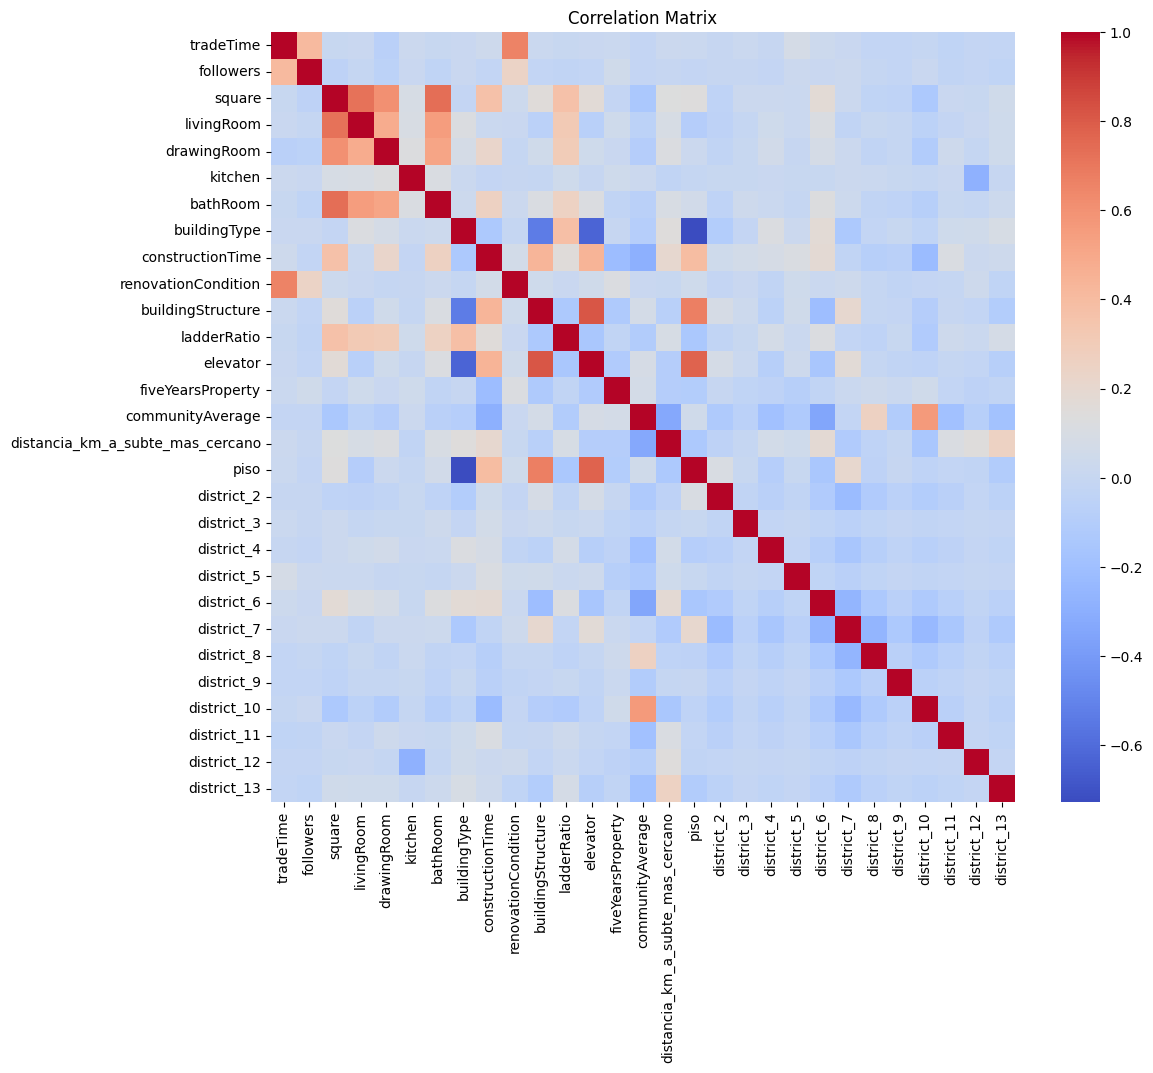

In [28]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Filter for correlations above the threshold
threshold = 0.4
strong_correlations = corr_matrix[abs(corr_matrix) > threshold]

# Display the strong correlations
display(strong_correlations)

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
tradeTime,1.000000,0.410741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.656842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
followers,0.410741,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square,NaN,NaN,1.000000,0.722605,0.602871,NaN,0.731103,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
livingRoom,NaN,NaN,0.722605,1.000000,0.480518,NaN,0.551674,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drawingRoom,NaN,NaN,0.602871,0.480518,1.000000,NaN,0.517697,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathRoom,NaN,NaN,0.731103,0.551674,0.517697,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constructionTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
renovationCondition,0.656842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


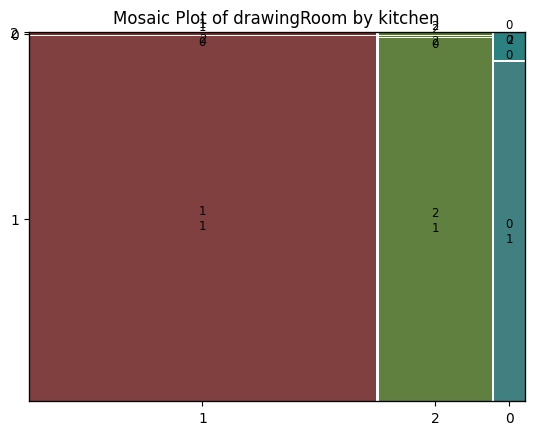

In [30]:
vars_mosaic = ['drawingRoom','kitchen']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

In [31]:
X['kitchen'].value_counts()

,count
kitchen,
1,315014
0,2676
2,849


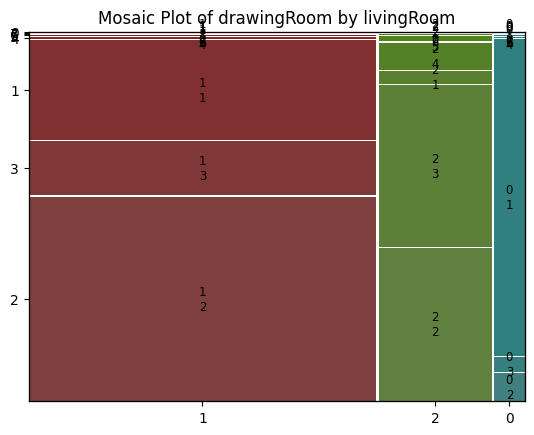

In [32]:
vars_mosaic = ['drawingRoom','livingRoom']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

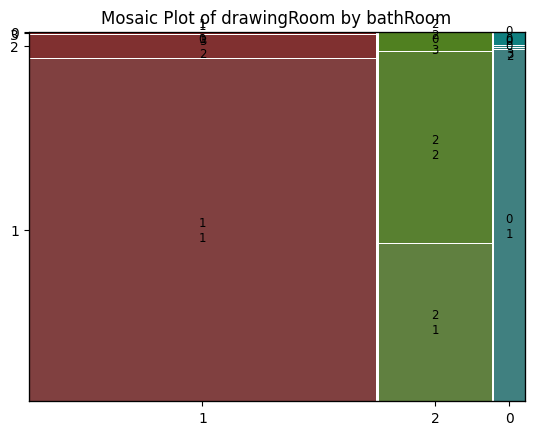

In [33]:
vars_mosaic = ['drawingRoom','bathRoom']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

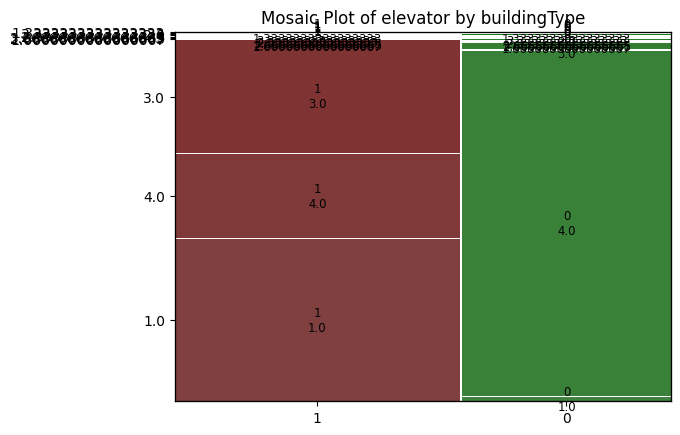

In [34]:
vars_mosaic = ['elevator','buildingType']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

## Dividimos datos

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos

In [36]:
def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [37]:
def forward_selection(X, y,AIC=True, verbose=True):
    remaining = list(X.columns)
    selected = []
    current_score, best_new_score = np.inf, np.inf
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = selected + [candidate]
            X_model = sm.add_constant(X[formula])
            model = sm.OLS(y, X_model).fit()
            if AIC:
              aic = model.aic
              scores_with_candidates.append((aic, candidate))
            else:
              bic = model.bic
              scores_with_candidates.append((bic, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            if verbose:
              if AIC:
                print(f"Añadido: {best_candidate}, AIC = {current_score:.2f}")
              else:
                print(f"Añadido: {best_candidate}, BIC = {current_score:.2f}")
        else:
            break
    return selected

In [38]:
def backward_elimination(X, y,AIC=True, verbose=True):
    selected = list(X.columns)
    current_score = np.inf
    while len(selected) > 0:
        scores_with_candidates = []
        for candidate in selected:
            formula = list(selected)
            formula.remove(candidate)
            X_model = sm.add_constant(X[formula], has_constant='add')
            try:
                model = sm.OLS(y, X_model).fit(disp=0)
                if AIC:
                  aic = model.aic
                  scores_with_candidates.append((aic, candidate))
                else:
                  bic = model.bic
                  scores_with_candidates.append((bic, candidate))
            except:
                continue
        if not scores_with_candidates:
            break
        scores_with_candidates.sort()
        best_new_score, worst_candidate = scores_with_candidates[0]
        if best_new_score < current_score:              # Chequear esta condicion
            selected.remove(worst_candidate)
            current_score = best_new_score
            if verbose:
              if AIC:
                print(f"Eliminado: {worst_candidate}, AIC = {current_score:.2f}")
              else:
                print(f"Eliminado: {worst_candidate}, BIC = {current_score:.2f}")
        else:
            break
    return selected

In [39]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    # Calcular las métricas
    RMSE = root_mean_squared_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'RMSE': [RMSE],
        'MSE': [MSE],
        'MAE': [MAE],
        'R2': [R2],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

### Establecemos un baseline

Nunca un modelo nos puede dar peor que este valor. El baseline va a ser el RMSE de predecir todas las propiedades con el promedio de precio de venta de las propiedades del set de entrenamiento

In [40]:
start1 = time.time()
root_mean_squared_error(y_test, [y_train.mean()]*len(y_test))
end1 = time.time()

In [41]:
model0 = guardo_resultados('Baseline', y_test, [y_train.mean()]*len(y_test), end1-start1)
model0

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.005936


### Modelo 1: regresion lineal multiple simple

Usamos todas las variables

In [80]:
start2 = time.time()
linear_model = LinearRegression(fit_intercept=True)  # fit_intercept es el único parámetro relevante
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
end2 = time.time()

In [81]:
model1 = guardo_resultados('Regresion lineal multiple simple', y_test, y_pred, end2-start2)
model1 = pd.concat([model1,model0])
model1

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple simple,1.079491e+06,1.165302e+12,7.034718e+05,0.776072,0.362468
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.005936


In [82]:
# Vemos variables mas importantes

selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X_train, y_train)
print("Selected feature indices:")
lista = X_train.columns[selector.get_support(indices=True)].to_list()
for i in range(len(lista)):
  print(f'{i+1}. {lista[i]}')

Selected feature indices:
1. tradeTime
2. followers
3. square
4. livingRoom
5. drawingRoom
6. bathRoom
7. constructionTime
8. renovationCondition
9. buildingStructure
10. ladderRatio
11. elevator
12. communityAverage
13. distancia_km_a_subte_mas_cercano
14. piso
15. district_4
16. district_6
17. district_8
18. district_10
19. district_11
20. district_13


In [61]:
# Variables menos importantes
[i for i in X.columns if i not in lista]

['kitchen',
 'buildingType',
 'fiveYearsProperty',
 'district_2',
 'district_3',
 'district_5',
 'district_7',
 'district_9',
 'district_12']

In [62]:
# seleccionadas_f_A = forward_selection(X_train, y_train)

# print("\nVariables seleccionadas:", seleccionadas_f_A)
# print("\nCantidad de variables seleccionadas: ",len(seleccionadas_f_A))
# print("\nCantidad de variables totales: ",len(X_train.columns))

In [83]:
seleccionadas_f_B = forward_selection(X_train, y_train, AIC=False)

print("\nVariables seleccionadas:", seleccionadas_f_B)
print("\nCantidad de variables seleccionadas: ",len(seleccionadas_f_B))
print("\nCantidad de variables totales: ",len(X_train.columns))

Añadido: square, BIC = 8088184.61
Añadido: communityAverage, BIC = 7961261.12
Añadido: tradeTime, BIC = 7828662.27
Añadido: district_10, BIC = 7823918.93
Añadido: renovationCondition, BIC = 7820251.86
Añadido: district_6, BIC = 7817218.95
Añadido: ladderRatio, BIC = 7816414.89
Añadido: buildingStructure, BIC = 7815421.28
Añadido: followers, BIC = 7814610.02
Añadido: district_5, BIC = 7813961.54
Añadido: fiveYearsProperty, BIC = 7813291.48
Añadido: distancia_km_a_subte_mas_cercano, BIC = 7812601.74
Añadido: district_9, BIC = 7812172.68
Añadido: district_7, BIC = 7811553.97
Añadido: district_2, BIC = 7811106.99
Añadido: district_8, BIC = 7810344.80
Añadido: constructionTime, BIC = 7809934.48
Añadido: district_12, BIC = 7809662.22
Añadido: piso, BIC = 7809436.32
Añadido: bathRoom, BIC = 7809217.21
Añadido: livingRoom, BIC = 7809154.79
Añadido: district_11, BIC = 7809102.41
Añadido: district_4, BIC = 7808976.12
Añadido: elevator, BIC = 7808938.58
Añadido: kitchen, BIC = 7808903.31
Añadido:

In [85]:
set(X_train) - set(seleccionadas_f_B)

{'buildingType', 'district_13'}

In [63]:
# seleccionadas_b_A = backward_elimination(X_train, y_train)

# print("\nVariables seleccionadas:", seleccionadas_b_A)
# print("\nCantidad de variables seleccionadas: ",len(seleccionadas_b_A))
# print("\nCantidad de variables totales: ",len(X_train.columns))

In [84]:
seleccionadas_b_B = backward_elimination(X_train, y_train, AIC=False)

print("\nVariables seleccionadas:", seleccionadas_b_B)
print("\nCantidad de variables seleccionadas: ",len(seleccionadas_b_B))
print("\nCantidad de variables totales: ",len(X_train.columns))

Eliminado: buildingType, BIC = 7808888.84
Eliminado: district_13, BIC = 7808882.15

Variables seleccionadas: ['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty', 'communityAverage', 'distancia_km_a_subte_mas_cercano', 'piso', 'district_2', 'district_3', 'district_4', 'district_5', 'district_6', 'district_7', 'district_8', 'district_9', 'district_10', 'district_11', 'district_12']

Cantidad de variables seleccionadas:  27

Cantidad de variables totales:  29


In [57]:
## Probamos con statsmodel para ver mas a las variables
X_train_sm = sm.add_constant(X_train)
log_reg_sm = sm.OLS(y_train, X_train_sm).fit()
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             totalPrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 3.074e+04
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        03:11:19   Log-Likelihood:            -3.9043e+06
No. Observations:              254831   AIC:                         7.809e+06
Df Residuals:                  254801   BIC:                         7.809e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Modelo 1 bis: sacamos algunas variables

In [86]:
vars_sacar = ['kitchen',
 'buildingType',
 'fiveYearsProperty',
 'district_13']

In [87]:
X_train2 = X_train.drop(columns=vars_sacar)
X_test2 = X_test.drop(columns=vars_sacar)

In [49]:
start3 = time.time()
linear_model = LinearRegression(fit_intercept=True)  # fit_intercept es el único parámetro relevante
linear_model.fit(X_train2, y_train)

y_pred = linear_model.predict(X_test2)
end3 = time.time()

In [50]:
model2 = guardo_resultados('Regresion lineal multiple simple (bis)', y_test, y_pred, end3-start3)
model2 = pd.concat([model2,model1])
model2

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple simple (bis),1.108111e+06,1.227910e+12,7.213150e+05,0.764041,0.086369
0,Regresion lineal multiple simple,1.079491e+06,1.165302e+12,7.034718e+05,0.776072,0.361039
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.005936


### Modelo 2: elevamos el grado del polinomio

In [ ]:
start4 = time.time()

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train2_poly = poly.fit_transform(X_train2)
X_test2_poly = poly.transform(X_test2)

poly_model = LinearRegression()
poly_model.fit(X_train2_poly, y_train)

y_pred = poly_model.predict(X_test2_poly)
end4 = time.time()

In [89]:
modelo3 = guardo_resultados('Regresion lineal multiple polinomial', y_test, y_pred, end4-start4)
modelo3 = pd.concat([modelo3,model2])
modelo3

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple polinomial,7.418578e+05,5.503530e+11,4.617665e+05,0.894242,24.877177
0,Regresion lineal multiple simple (bis),1.108111e+06,1.227910e+12,7.213150e+05,0.764041,0.086369
0,Regresion lineal multiple simple,1.079491e+06,1.165302e+12,7.034718e+05,0.776072,0.361039
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.005936


Mínimo de error en test con grado 3


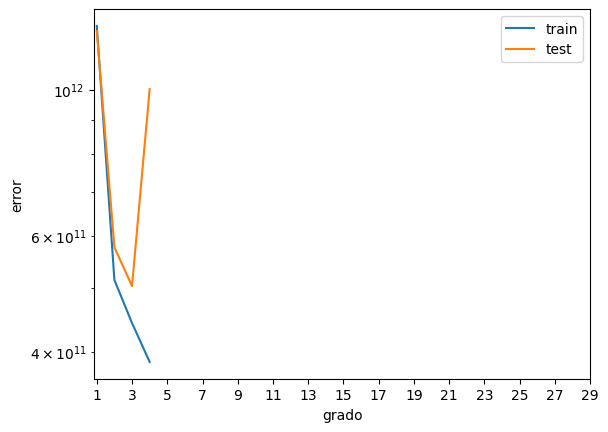

In [51]:
# Graficamos los errores en train y test para distintos grados
train_errors = []
test_errors = []
degrees = np.arange(1, 5)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train2_poly = poly.fit_transform(X_train2)
    reg = LinearRegression()
    reg.fit(X_train2_poly, y_train)
    train_errors.append(mean_squared_error(y_train, reg.predict(X_train2_poly)))
    test_errors.append(mean_squared_error(y_test, reg.predict(poly.transform(X_test2))))

plt.plot(degrees, train_errors, label='train')
plt.plot(degrees, test_errors, label='test')
plt.xticks(np.arange(1,31,2))
plt.yscale('log')
plt.legend()
plt.xlabel('grado')
plt.ylabel('error')
print('Mínimo de error en test con grado',degrees[np.argmin(test_errors)])

### Modelo 3: agregamos regularizacion (Ridge regularization)

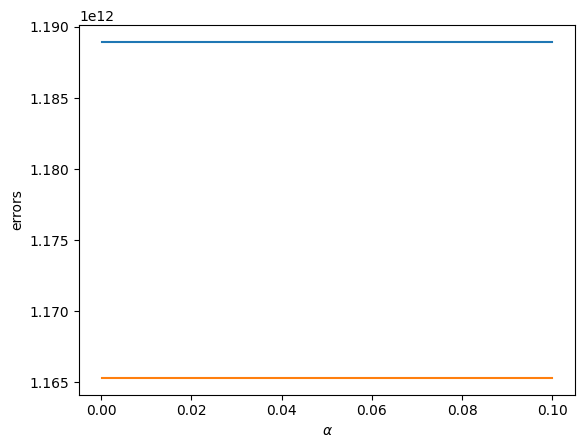

In [77]:
# Vemos como varia el error cuadratico medio a medida que cambia el alpha
# (manteniendo constante el grado del polinomio de regresion)

alphas = np.linspace(0.0001,0.1,50)
train_errors = []
r2_train = []

test_errors = []
r2_test = []
for alpha in alphas:
  reg_Ridge = Ridge(alpha=alpha)
  reg_Ridge.fit(X_train, y_train)
  train_error = mean_squared_error(y_train, reg_Ridge.predict(X_train))
  train_errors.append(train_error)
  r2_train.append(r2_score(y_train, reg_Ridge.predict(X_train)))

  test_error = mean_squared_error(y_test, reg_Ridge.predict(X_test))
  test_errors.append(test_error)
  r2_test.append(r2_score(y_test, reg_Ridge.predict(X_test)))

plt.plot(alphas,train_errors,'-')
plt.plot(alphas,test_errors,'-')
plt.xlabel(r'$\alpha$')
plt.ylabel('errors');

### Modelo 4: optimizamos hiperparametros con Random Search CV